In [119]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [5]:
df=pd.read_csv('marketing_campaign_dataset.csv')

In [6]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang
0,a100000000,2018-01-10,Instagram,personalization,True,Spanish,English,36-45 years,2018-01-10,NaN,NaN,False,5.0,No
1,a100000001,2018-01-08,Instagram,control,True,German,English,19-24 years,2018-01-08,NaN,NaN,False,NaN,Yes
2,a100000002,2018-01-29,Email,control,True,German,English,19-24 years,2018-01-29,NaN,Email,False,4.0,Yes
3,a100000003,2018-01-13,Push,control,False,English,Arabic,45-55 years,NaN,2018-02-05,House Ads,True,NaN,Yes
4,a100000004,2018-01-28,Facebook,control,False,Arabic,German,24-30 years,NaN,2018-02-16,Facebook,True,4.0,Yes


In [7]:
df.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'channel_code', 'is_correct_lang'],
      dtype='object')

**Creating the Date of Week column for analysis based on time**

In [8]:
df['DoW']=pd.to_datetime(df['date_served']).dt.dayofweek

**Important Metrics of Marketing**


1.   Conversion Rate
2.   Retention Rate



**Conversion Rate for different channels**
* Number of Subscribers/Number of Total Users

In [9]:
# Calculate the number of total users
total_users=df.groupby(['marketing_channel'])['user_id'].nunique()

# Calculate the number of subscribers
total_subscribers=df[df['converted']==True].groupby(['marketing_channel'])['user_id'].nunique()

# Conversion rate
conversion_rate_of_different_channels=total_subscribers/total_users
print(round(conversion_rate_of_different_channels*100, 2), "%")


marketing_channel
Email        50.63
Facebook     50.90
House Ads    49.16
Instagram    50.76
Push         50.03
Name: user_id, dtype: float64 %


**Retention Rate for different channels**


*   Number of people who remain subscribed / Total number of people who converted




In [10]:
# Calculate the number of users remain subscribed
retain_users=df[df['is_retained']==True].groupby(['subscribing_channel'])['user_id'].nunique()

# Calculate the number of subscribers under each subscribing channel
subscribers_of_each_channel=df[df['converted']==True].groupby(['subscribing_channel'])['user_id'].nunique()


# Retention Rate
retention_rate_of_different_channels=retain_users/subscribers_of_each_channel
print(round(retention_rate_of_different_channels*100, 2), "%")


subscribing_channel
Email        101.48
Facebook     103.33
House Ads    103.31
Instagram     97.13
Push         103.71
Name: user_id, dtype: float64 %


**Customer Segmentation By Language**

In [11]:
# Isolate english speakers
english_speakers = df[df['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()


# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 49.73 %


**Conversion Rate Segmented By Language**

language_displayed
Arabic     48.89
English    49.73
German     50.93
Spanish    51.04
Name: user_id, dtype: float64 %


Text(0, 0.5, 'Conversion rate (%)')

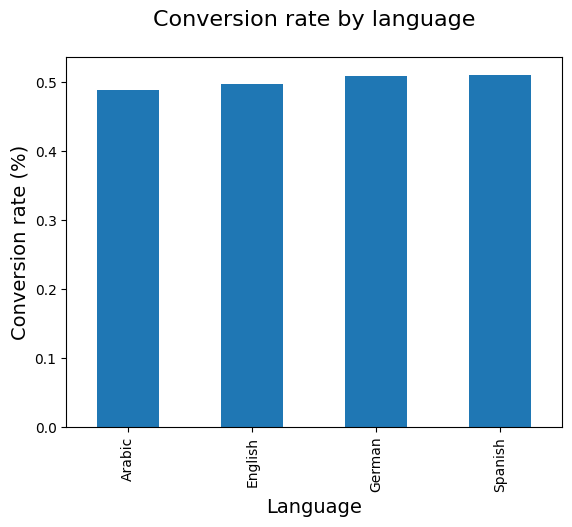

In [12]:
# Group by language_displayed and count unique users
total = df.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = df[df['converted']==True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = (subscribers/total)
print(round(language_conversion_rate*100,2),"%")


#Create a bar chart
language_conversion_rate.plot(kind='bar')
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

**Whether there is any difference in the conversion rate based on when in the month, the users saw an ad.**

In [13]:
#Group by date and count unique users
total_by_date=df.groupby('date_served')['user_id'].nunique()

#Group by date and count unique conversions
subscribers_by_date=df[df['converted']==True].groupby('date_served')['user_id'].nunique()

#Calculate the conversion rate
daily_conversion_rate=subscribers_by_date/total_by_date


**Transfer data into dataframe**

In [14]:
daily_conversion_rate=pd.DataFrame(daily_conversion_rate.reset_index())

# Rename columns
daily_conversion_rate.columns=['date_served',
                              'conversion_rate']

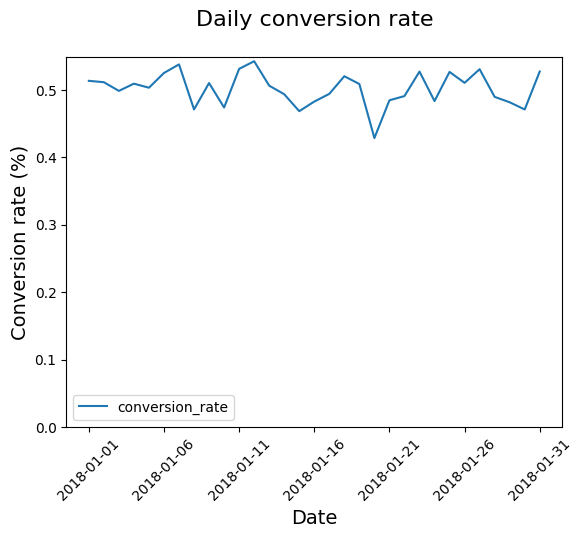

In [15]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Rotate x-axis labels
plt.xticks(rotation=45)
# Set the y-axis to begin at 0
plt.ylim(0)

plt.show()

**Analyze the marketing channels across age groups**

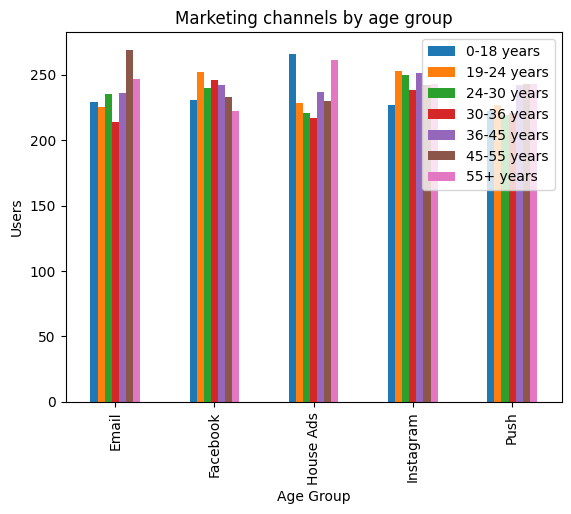

In [16]:
channel_age = df.groupby(['marketing_channel', 'age_group'])['user_id'].count()


# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

# Add a legend to the plot
plt.legend(loc='upper right', labels=channel_age_df.columns.values)
plt.show()

**Analyze which channel has the best performance in retention rate by date**

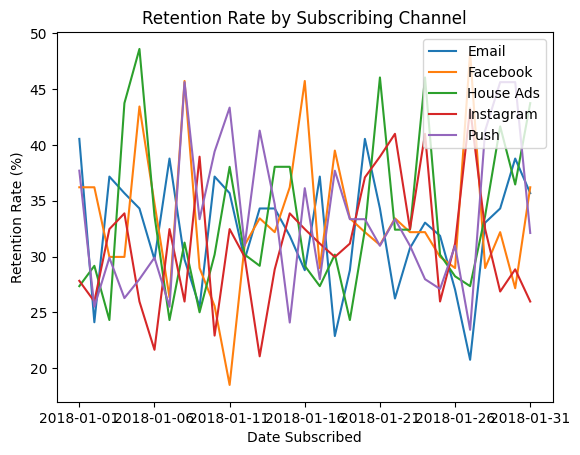

In [17]:
# Count the total number of subscribers by sub channel and date subscribed
retention_total=df.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Count the retained subscribers by sub channels and date subscribed
retention_subs=df[df['is_retained']==True].groupby('subscribing_channel')['user_id'].nunique()

retention_rate=retention_subs/retention_total

# Transfer series to dataframe
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right',
           labels=retention_rate_df.columns.values)
plt.show()

**Build a function for conversion rate**

In [18]:
def conversion_rate(dataframe,column_names):

  total=dataframe.groupby(column_names)['user_id'].nunique()

  subs=dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

  conversion_rate=subs/total

  # Fill missing values with 0
  conversion_rate = conversion_rate.fillna(0)

  return conversion_rate

**Conversion Rate by Age Group**

date_served  age_group  
2018-01-01   0-18 years     0.428571
             19-24 years    0.580000
             24-30 years    0.477273
             30-36 years    0.571429
             36-45 years    0.512821
                              ...   
2018-01-31   24-30 years    0.487179
             30-36 years    0.589744
             36-45 years    0.585366
             45-55 years    0.500000
             55+ years      0.513514
Name: user_id, Length: 217, dtype: float64


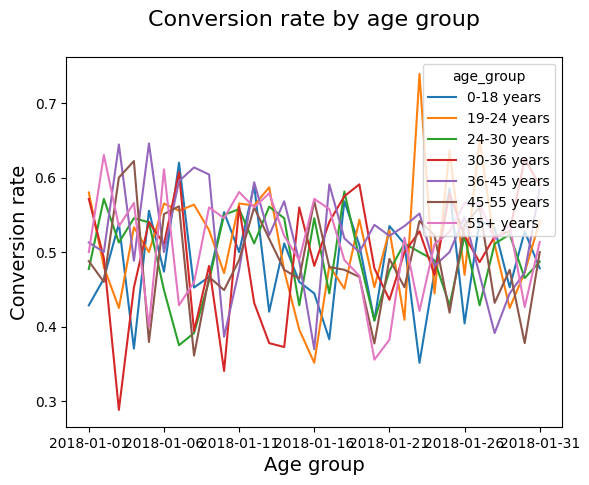

In [19]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(df, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

**Create a function for generate plot seperately**

In [20]:
def plotting_conv(dataframe):
  for column in dataframe.columns:
    plt.plot(dataframe.index, dataframe[column])
    plt.title('Daily'+str(column)+'Conversion Rate\n', size=16)
    plt.xlabel('Date', size=14)
    plt.ylabel('Conversion rate', size=14)
    plt.xticks(rotation=90)
    plt.show()
    #Clear the current figure
    plt.clf()

**Daily conversion rate for each age group**

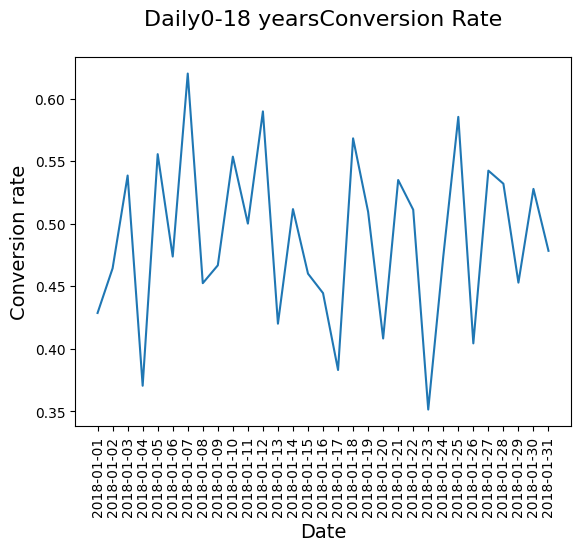

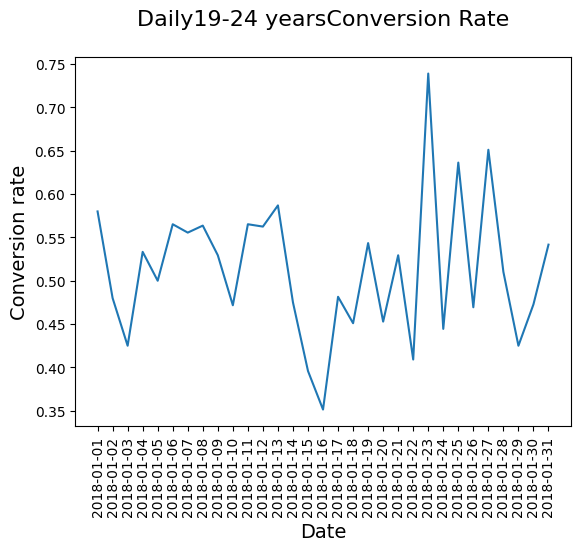

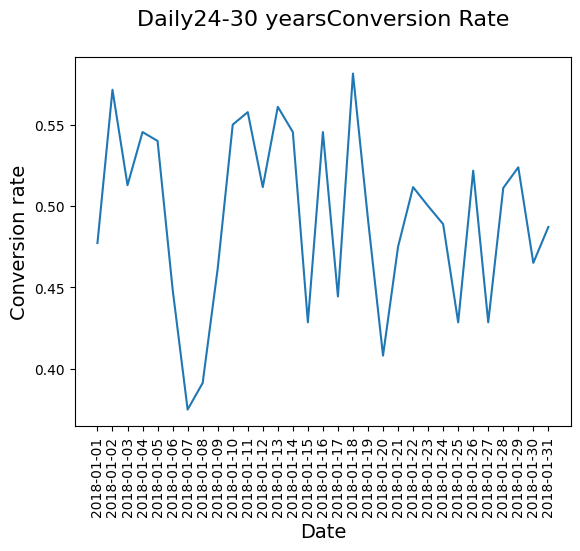

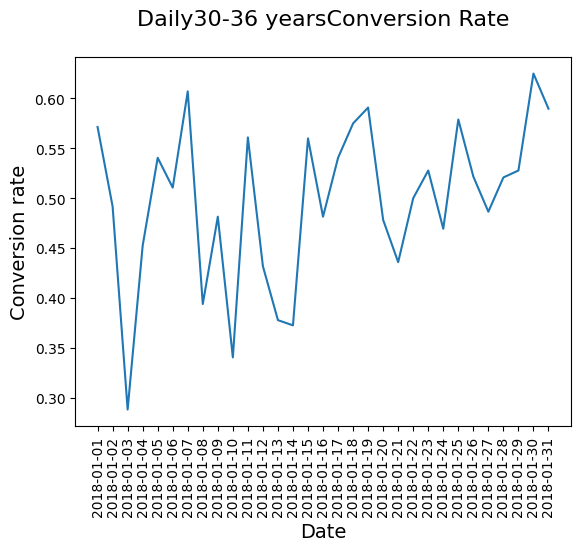

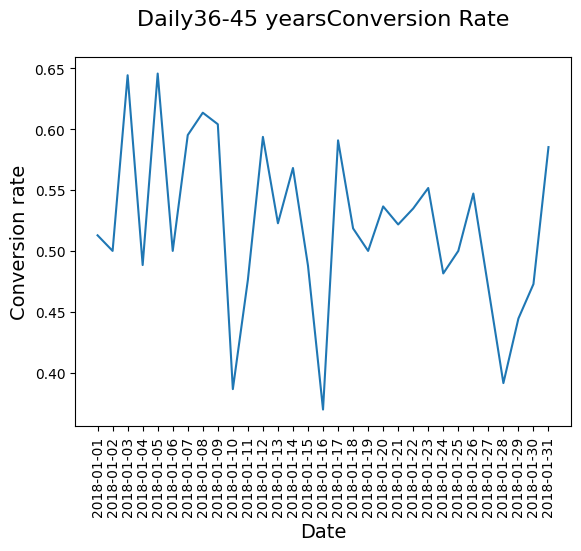

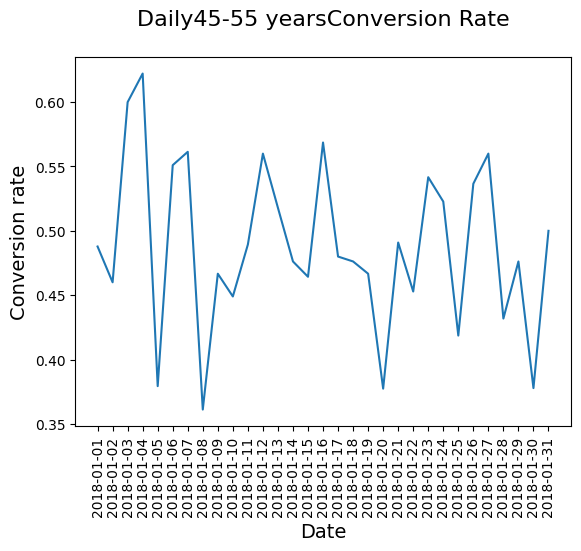

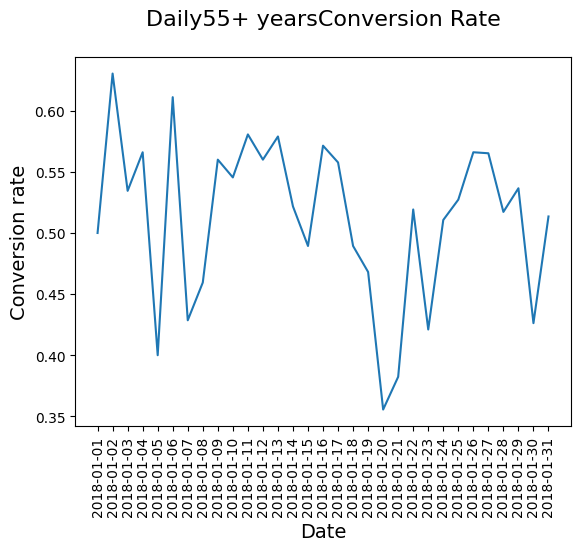

<Figure size 640x480 with 0 Axes>

In [21]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(df,['date_served','age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

**Conversion Rate By Marketing Channel**

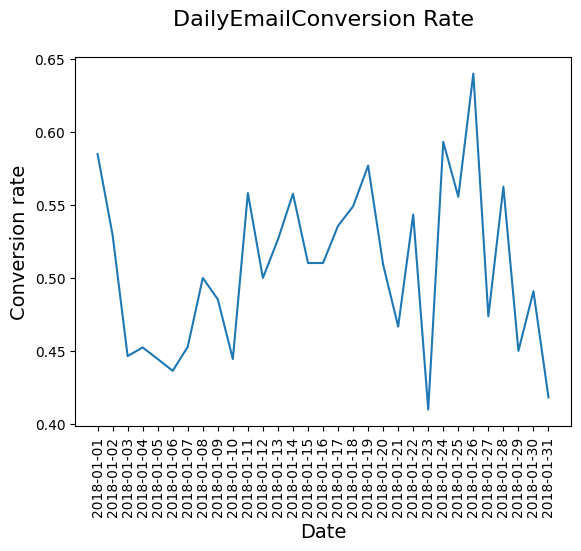

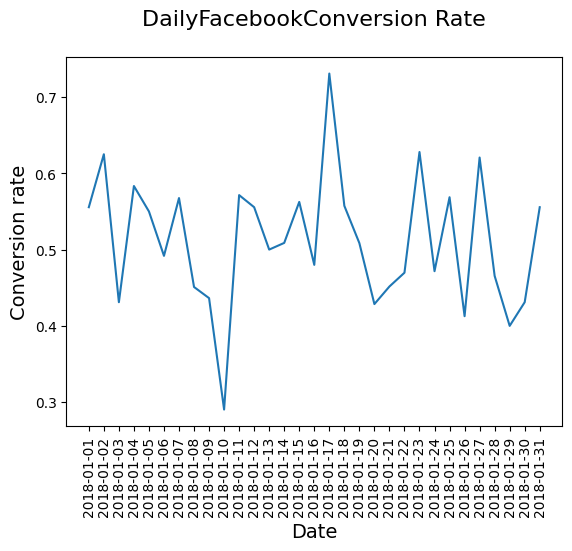

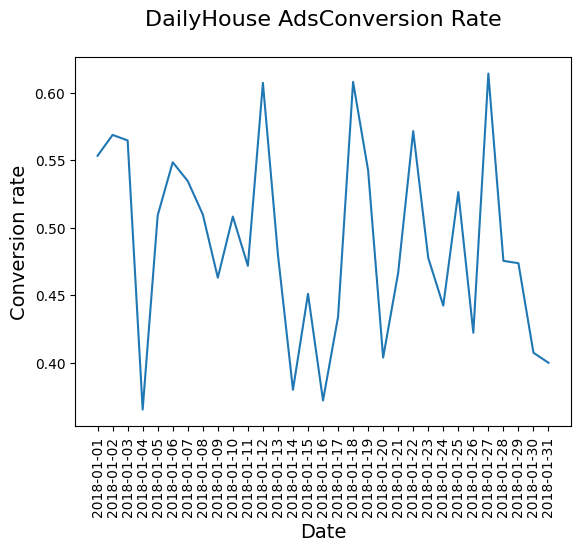

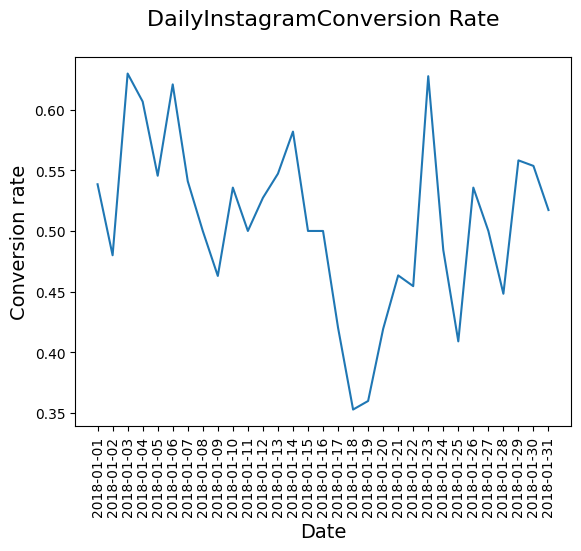

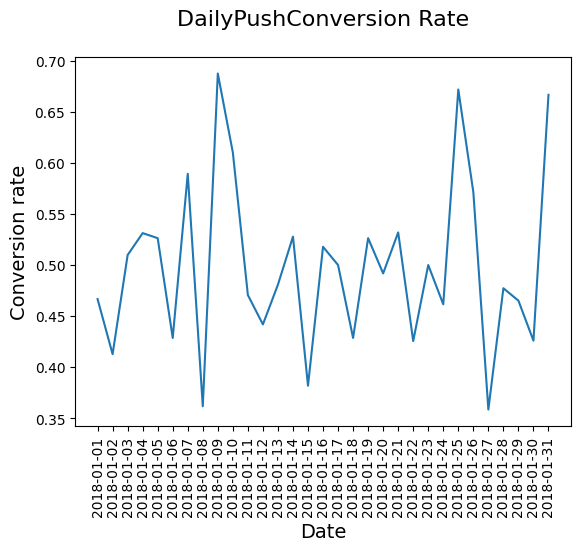

<Figure size 640x480 with 0 Axes>

In [24]:
# Calculate conversion rate by channel
channel_conv = conversion_rate(df, ['date_served', 'marketing_channel'])

# Unstack and create a DataFrame
channel_df = pd.DataFrame(channel_conv.unstack(level=1))

# Visualize the results
plotting_conv(channel_df)

* **Noticed a relatively low conversion rate for House Ad**
* **Figure out what is the root cause of this issue**

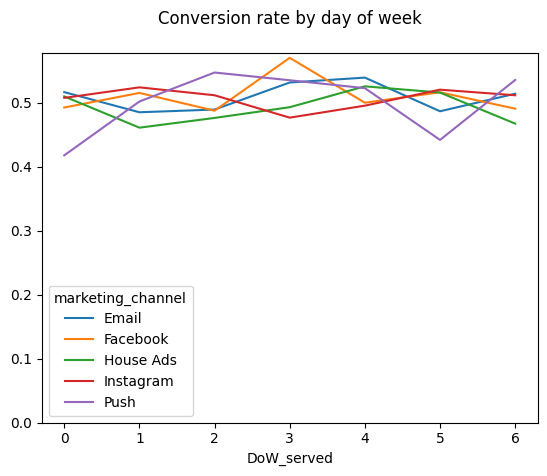

In [22]:
# Add day of week column to marketing
df['DoW_served'] =pd.to_datetime(df['date_served']).dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(df, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

**Trying to figure out what cause this converion rate sudden drop from Jan 11th for House Ad**

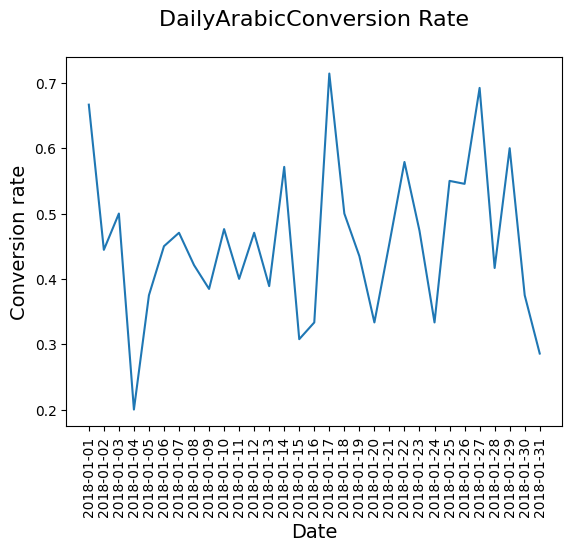

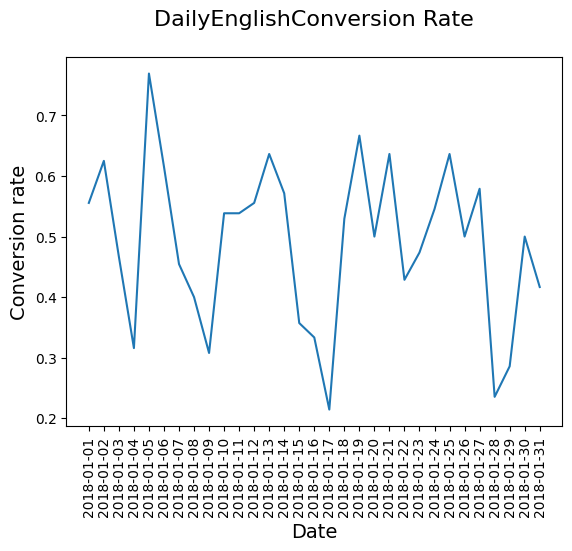

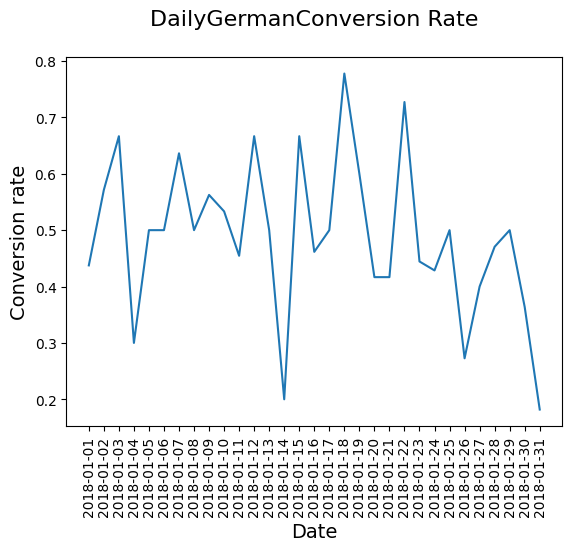

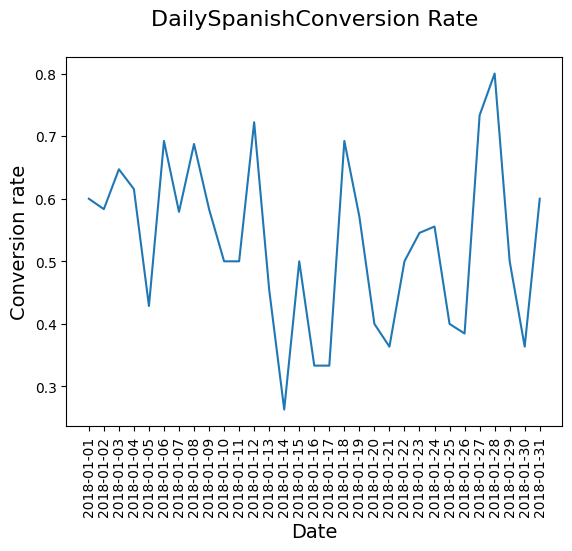

<Figure size 640x480 with 0 Axes>

In [31]:
# isolate the House Ads dataset
house_ad=df[df['marketing_channel']=='House Ads']

# calculate the conversion rate by date served and language displayed
house_ad_conv=conversion_rate(house_ad,['date_served','language_displayed'])

conv_lang_df=pd.DataFrame(house_ad_conv.unstack(level=1))

# Plot the results
plotting_conv(conv_lang_df)

* **After reviewing the conversion rates for different languages, it appears that the English conversion rate experienced a decline around January 11th, while the rates for other languages remained steady**

<ipython-input-37-f3ab4bd01aeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ad['language_is_correct']=np.where(house_ad['language_displayed']==house_ad['language_preferred'],'Yes','No')


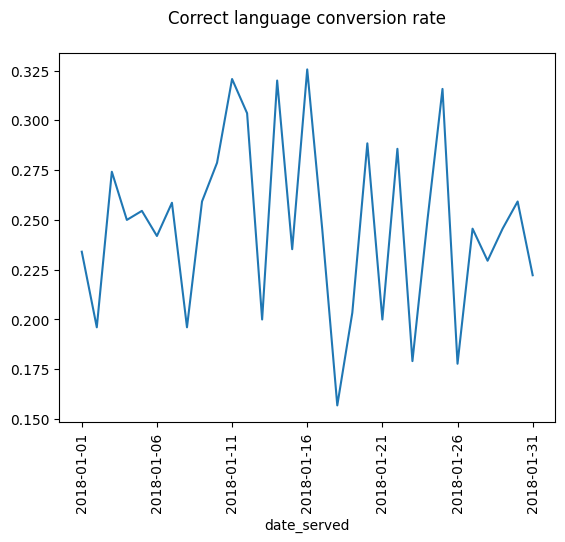

In [37]:
# Add a new column indidcate if the displayed language same as the preferred one
house_ad['language_is_correct']=np.where(house_ad['language_displayed']==house_ad['language_preferred'],'Yes','No')

num_correct_lang=house_ad[house_ad['language_is_correct']=='Yes'].groupby('date_served')['user_id'].nunique()

total_users=house_ad.groupby('date_served')['user_id'].nunique()

# Calculate the correct language rate
correct_lang_conv=num_correct_lang/total_users

# Plot and show result
correct_lang_conv.plot()
plt.title('Correct language conversion rate\n')
plt.xticks(rotation=90)
plt.show()

**From the graph, we can observe that house ads have not been displayed in the correct language for users whose preferred language is not English since January 11th.**

We need to know the real conversion rate if the language is correct for these usees.

In [102]:
# Calculate pre-error conversion rate
lang_conv_before=conversion_rate(house_ad[house_ad['date_served']<'2018-01-11'],['language_displayed'])


# Index other language conversion rate against English
Spanish_index=lang_conv_before['Spanish']/lang_conv_before['English']
Arabic_index=lang_conv_before['Arabic']/lang_conv_before['English']
German_index=lang_conv_before['German']/lang_conv_before['English']


In [103]:
print(Spanish_index)
print(Arabic_index)
print(German_index)

1.1884057971014492
0.8903225806451613
1.046875


In [104]:
# Calcualte after-error conversion rate for English
lang_conv_after=conversion_rate(house_ad[(house_ad['date_served']>='2018-01-11')&(house_ad['is_correct_lang']=='Yes')],['language_displayed'])


# Create new data frame to calculate the number of converted customers for each language if no error
converted = house_ad.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

converted_df=pd.DataFrame(converted.unstack(level=1))

# Create English conversion rate column for affected period

converted_df['englishz_conv_rate']=converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]/converted_df.loc['2018-01-11':'2018-01-31'][('user_id','English')]

# Create expected conversion rates for each language
Spanish_conv_rate_after=converted_df['englishz_conv_rate']*Spanish_index
Arabic_conv_rate_after=converted_df['englishz_conv_rate']*Arabic_index
German_conv_rate_after=converted_df['englishz_conv_rate']*German_index

# Calculate how many users are converted by multipling expected conversion rate
converted_df['expected_spanish_conv']=Spanish_conv_rate_after*converted_df.loc['2018-01-11':'2018-01-31']['user_id']['Spanish']
converted_df['expected_arabic_conv']=Arabic_conv_rate_after*converted_df.loc['2018-01-11':'2018-01-31']['user_id']['Arabic']
converted_df['expected_german_conv']=German_conv_rate_after*converted_df.loc['2018-01-11':'2018-01-31']['user_id']['German']

In [105]:
converted_df.tail()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-27              16      17     13      11         7      10     11   
2018-01-28              19      14     16      12         8       7      9   
2018-01-29              16      17      6      18         7      12      2   
2018-01-30              11      13     11      19         9       5      2   
2018-01-31              12      18      7       8         5      10      1   

                           englishz_conv_rate expected_spanish_conv  \
language_preferred Spanish                                            
date_served                                                           
2018-01-27               7           0.588235              7.689685   
2018-01-28               5           0.500000              7.130435   
2018-01-29               6           0.705882             15.099744   
2018-01-30               6           0.384615              8.684504   
2018-01-31               2           0.555556              5.281804   

                   expected_arabic_conv expected_german_conv  
language_preferred                                            
date_served                                                   
2018-01-27                     8.379507             8.005515  
2018-01-28                     8.458065             8.375000  
2018-01-29                    10.055408             4.433824  
2018-01-30                     3.766749             4.429087  
2018-01-31                     5.935484             4.071181

After I calculated the expected users that are converted without the error in langugae. We need to analyze the impact of this problem. By conducting statistic test

In [106]:
# Slicing the data only keep relavent dates
converted_df=converted_df.loc['2018-01-11':'2018-01-31']


np.mean(converted_df['converted']['Spanish'])
np.mean(converted_df['expected_spanish_conv'])

# Sum expected subscribers for each language
expected_subs = converted_df['expected_german_conv'].sum() + converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Arabic')].sum() + converted_df[('converted','Spanish')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the error
lost_subs = expected_subs-actual_subs
print(lost_subs)



66.24997775640946


# A/B Testing Result for Email Campaign


*   Emails are differentiate with personalization and normal
*   The difference is indicated by variant



In [108]:
df.variant

,variant
0,personalization
1,control
2,control
3,control
4,control
...,...
10032,personalization
10033,personalization
10034,personalization
10035,control


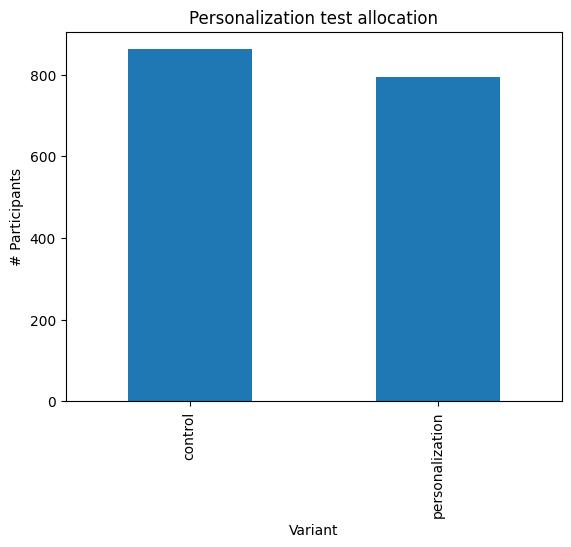

In [109]:
# Subset the DataFrame
email=df[df['marketing_channel']=='Email']

# Group the email DataFrame by variant
alloc=email.groupby('variant')['user_id'].nunique()

# Visualize the test allocation with bar chart
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.xlabel('Variant')
plt.ylabel('# Participants')
plt.show()

* Calculate conversion rate as key metric

In [150]:
# Group emails by user_id and variant
subscribers=email.groupby(['user_id','variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1))

# Drop missing values
control=subscribers_df['control'].dropna()
personalization=subscribers_df['personalization'].dropna()


# Calculate Lift

* $$\frac{\text{Treatment Conversion Rate} - \text{Control Conversion Rate}}{\text{Control Conversion Rate}}$$


In [144]:
# Create a function for calculating Lift

def lift(a,b):

    a_mean=np.mean(a)
    b_mean=np.mean(b)
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
    return str(round(lift*100, 2)) + '%'

# Print lift() with control and personalization as inputs
print(lift(control, personalization))

1.19%


In [148]:
control

,control
user_id,
a100000002,True
a100000010,False
a100000025,True
a100000033,False
a100000043,True
...,...
a100009971,True
a100009974,False
a100009984,True


# Evaluating Statistical Significance

In [151]:
# stats.ttest_ind()

control = control.astype(int)
personalization=personalization.astype(int)
stats.ttest_ind(control, personalization)

TtestResult(statistic=-0.2428394673163861, pvalue=0.8081598880526973, df=1653.0)

* The results are statistically significant with p =

# Create function for A/B testing with different segementations (language, age group, channel...)

In [155]:
def ab_segmentation(segment):
  for subsegment in np.unique(df[segment].values):
    print(subsegment)

  # Limit marketing to email and subsegment
    email = df[(df['marketing_channel'] == 'Email') & (df[segment] == subsegment)]

    subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
    subscribers = pd.DataFrame(subscribers.unstack(level=1))
    control = subscribers['control'].dropna().astype(int)
    personalization = subscribers['personalization'].dropna().astype(int)

    print('lift:', lift(control,personalization))
    print('t-statistic:', stats.ttest_ind(control,personalization), '\n\n')


In [156]:
ab_segmentation('age_group')

0-18 years
lift: 21.0%
t-statistic: TtestResult(statistic=-1.315829798388972, pvalue=0.18955848159494224, df=227.0) 


19-24 years
lift: -13.9%
t-statistic: TtestResult(statistic=1.115629756620568, pvalue=0.26578140661726185, df=223.0) 


24-30 years
lift: 10.92%
t-statistic: TtestResult(statistic=-0.7532628147884388, pvalue=0.4520524427180511, df=233.0) 


30-36 years
lift: -1.89%
t-statistic: TtestResult(statistic=0.15952984531754635, pvalue=0.8734033302202656, df=212.0) 


36-45 years
lift: 11.56%
t-statistic: TtestResult(statistic=-0.8778560776825242, pvalue=0.3809222651130677, df=234.0) 


45-55 years
lift: -11.86%
t-statistic: TtestResult(statistic=1.021559452364539, pvalue=0.3079141569533646, df=267.0) 


55+ years
lift: -0.05%
t-statistic: TtestResult(statistic=0.004123970679216917, pvalue=0.9967129127040364, df=245.0) 




In [152]:
df.columns


Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'channel_code', 'is_correct_lang', 'DoW', 'DoW_served'],
      dtype='object')